Install the missing required Python packages.

In [41]:
!pip install mnist
!pip install chart-studio
!pip install plotly
debug = False

Import libraries and initialize random seed.

In [42]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1234)

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams["figure.figsize"] = [16, 9]

The `tiles()` function is imported from the previous laboratory.

In [43]:
# arrange 2D matrices as tiles (takes 4D `examples` tensor with dims: rows x cols x tile_height x tile_width)
def tiles(examples):
    rows_count = examples.shape[0]
    cols_count = examples.shape[1]
    tile_height = examples.shape[2]
    tile_width = examples.shape[3]
    
    space_between_tiles = 2

    Sbt = space_between_tiles

    image_width = cols_count*tile_width + (cols_count-1)*Sbt
    image_height = rows_count*tile_height + (rows_count-1)*Sbt

    if debug:
      print(rows_count,"  ", cols_count, "  ", tile_height, "  ", tile_width, "  ", image_width, "  ", image_height )

    img_matrix = np.empty(shape=(image_height, image_width))
    img_matrix.fill(255)

    for i in range(cols_count):
      for j in range(rows_count):
        pos_x = (tile_width+Sbt)*i
        pos_y = (tile_height+Sbt)*j

        if debug:
          print(np.shape(examples[i, j]))

        img_matrix[pos_y:pos_y+tile_height, pos_x:pos_x+tile_width] = examples[j, i]
    
    return img_matrix

## MNIST Dataset

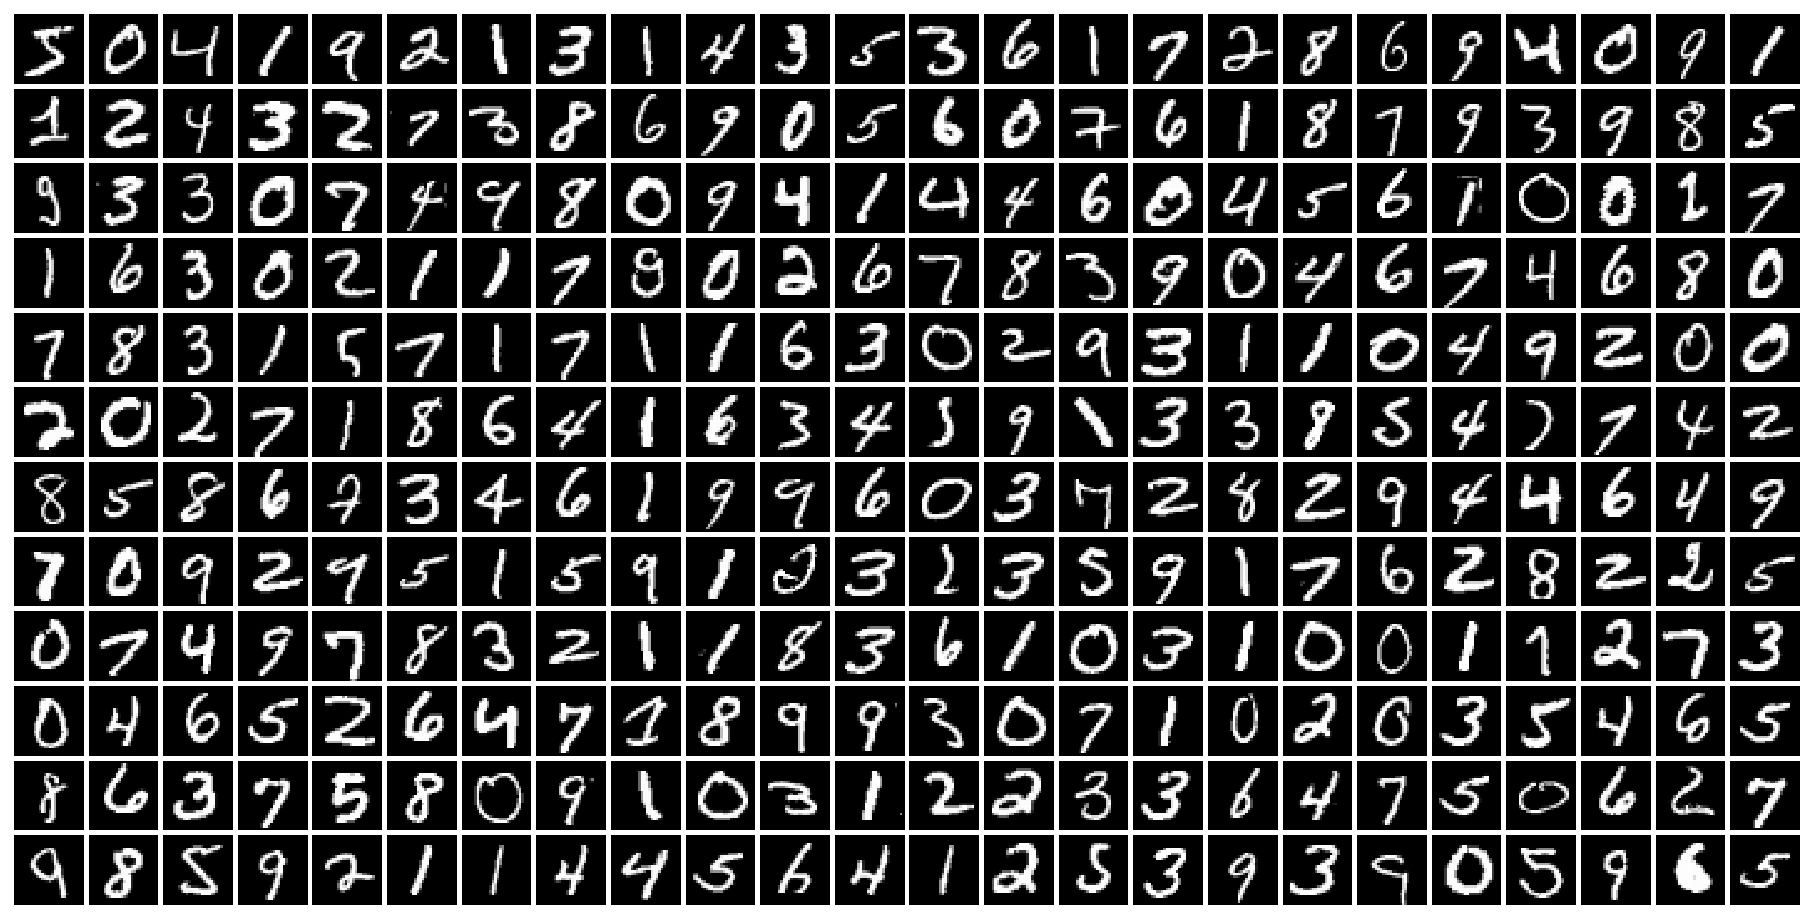

In [44]:
import mnist
digits = np.reshape(mnist.train_images()[:12*24], newshape=(12, 24, 28, 28))
img = tiles(digits)

plt.matshow(img, cmap='gray', interpolation='none')
plt.axis('off')
plt.show()

In [45]:
X = mnist.train_images().astype(np.float32) / 255.0
y = mnist.train_labels()
X.shape

(60000, 28, 28)

Reshape `X` so that the last two dimensions are collapsed into single dimension.

In [46]:
X = X.reshape(X.shape[0], -1)

In [47]:
X.shape

(60000, 784)

## Visualizing the distribution of MNIST digits

Add a scatter plot to `plot`, which:
* displys the first two dimensions of `X`,
* includes only these elements from `X` for which `y == i` (i.e. elements from the i-th class),
* includes label (i.e. `i`) in the legend.


In [48]:
def plot_2d_mnist_scatter(X, y):
    fig, plot = plt.subplots()
    fig.set_size_inches(16, 16)
    plt.prism()

    for i in range(10):
        digit_indeces = y == i
        dim1 = X[digit_indeces, 0]
        dim2 = X[digit_indeces, 1]
        plot.scatter(dim1, dim2)

    plot.set_xticks(())
    plot.set_yticks(())

    plt.tight_layout()
    plt.legend()
    plt.show()

### Principal Component Analysis (PCA)

In [49]:
SAMPLES_LIMIT = 2000
X_small = X[:SAMPLES_LIMIT]
y_small = y[:SAMPLES_LIMIT]

Use PCA function to embed `X_small` in two dimensions. Store the result in `X_pca_embedded`.

In [50]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)     # ZRZUTUJ DANE WEJSCIOWE NA 2D i ZAPISZ W X PCA EMBEDDED
pca.fit(X_small)
X_pca_embedded = pca.transform(X_small)

In [51]:
X_pca_embedded.shape

(2000, 2)

No handles with labels found to put in legend.


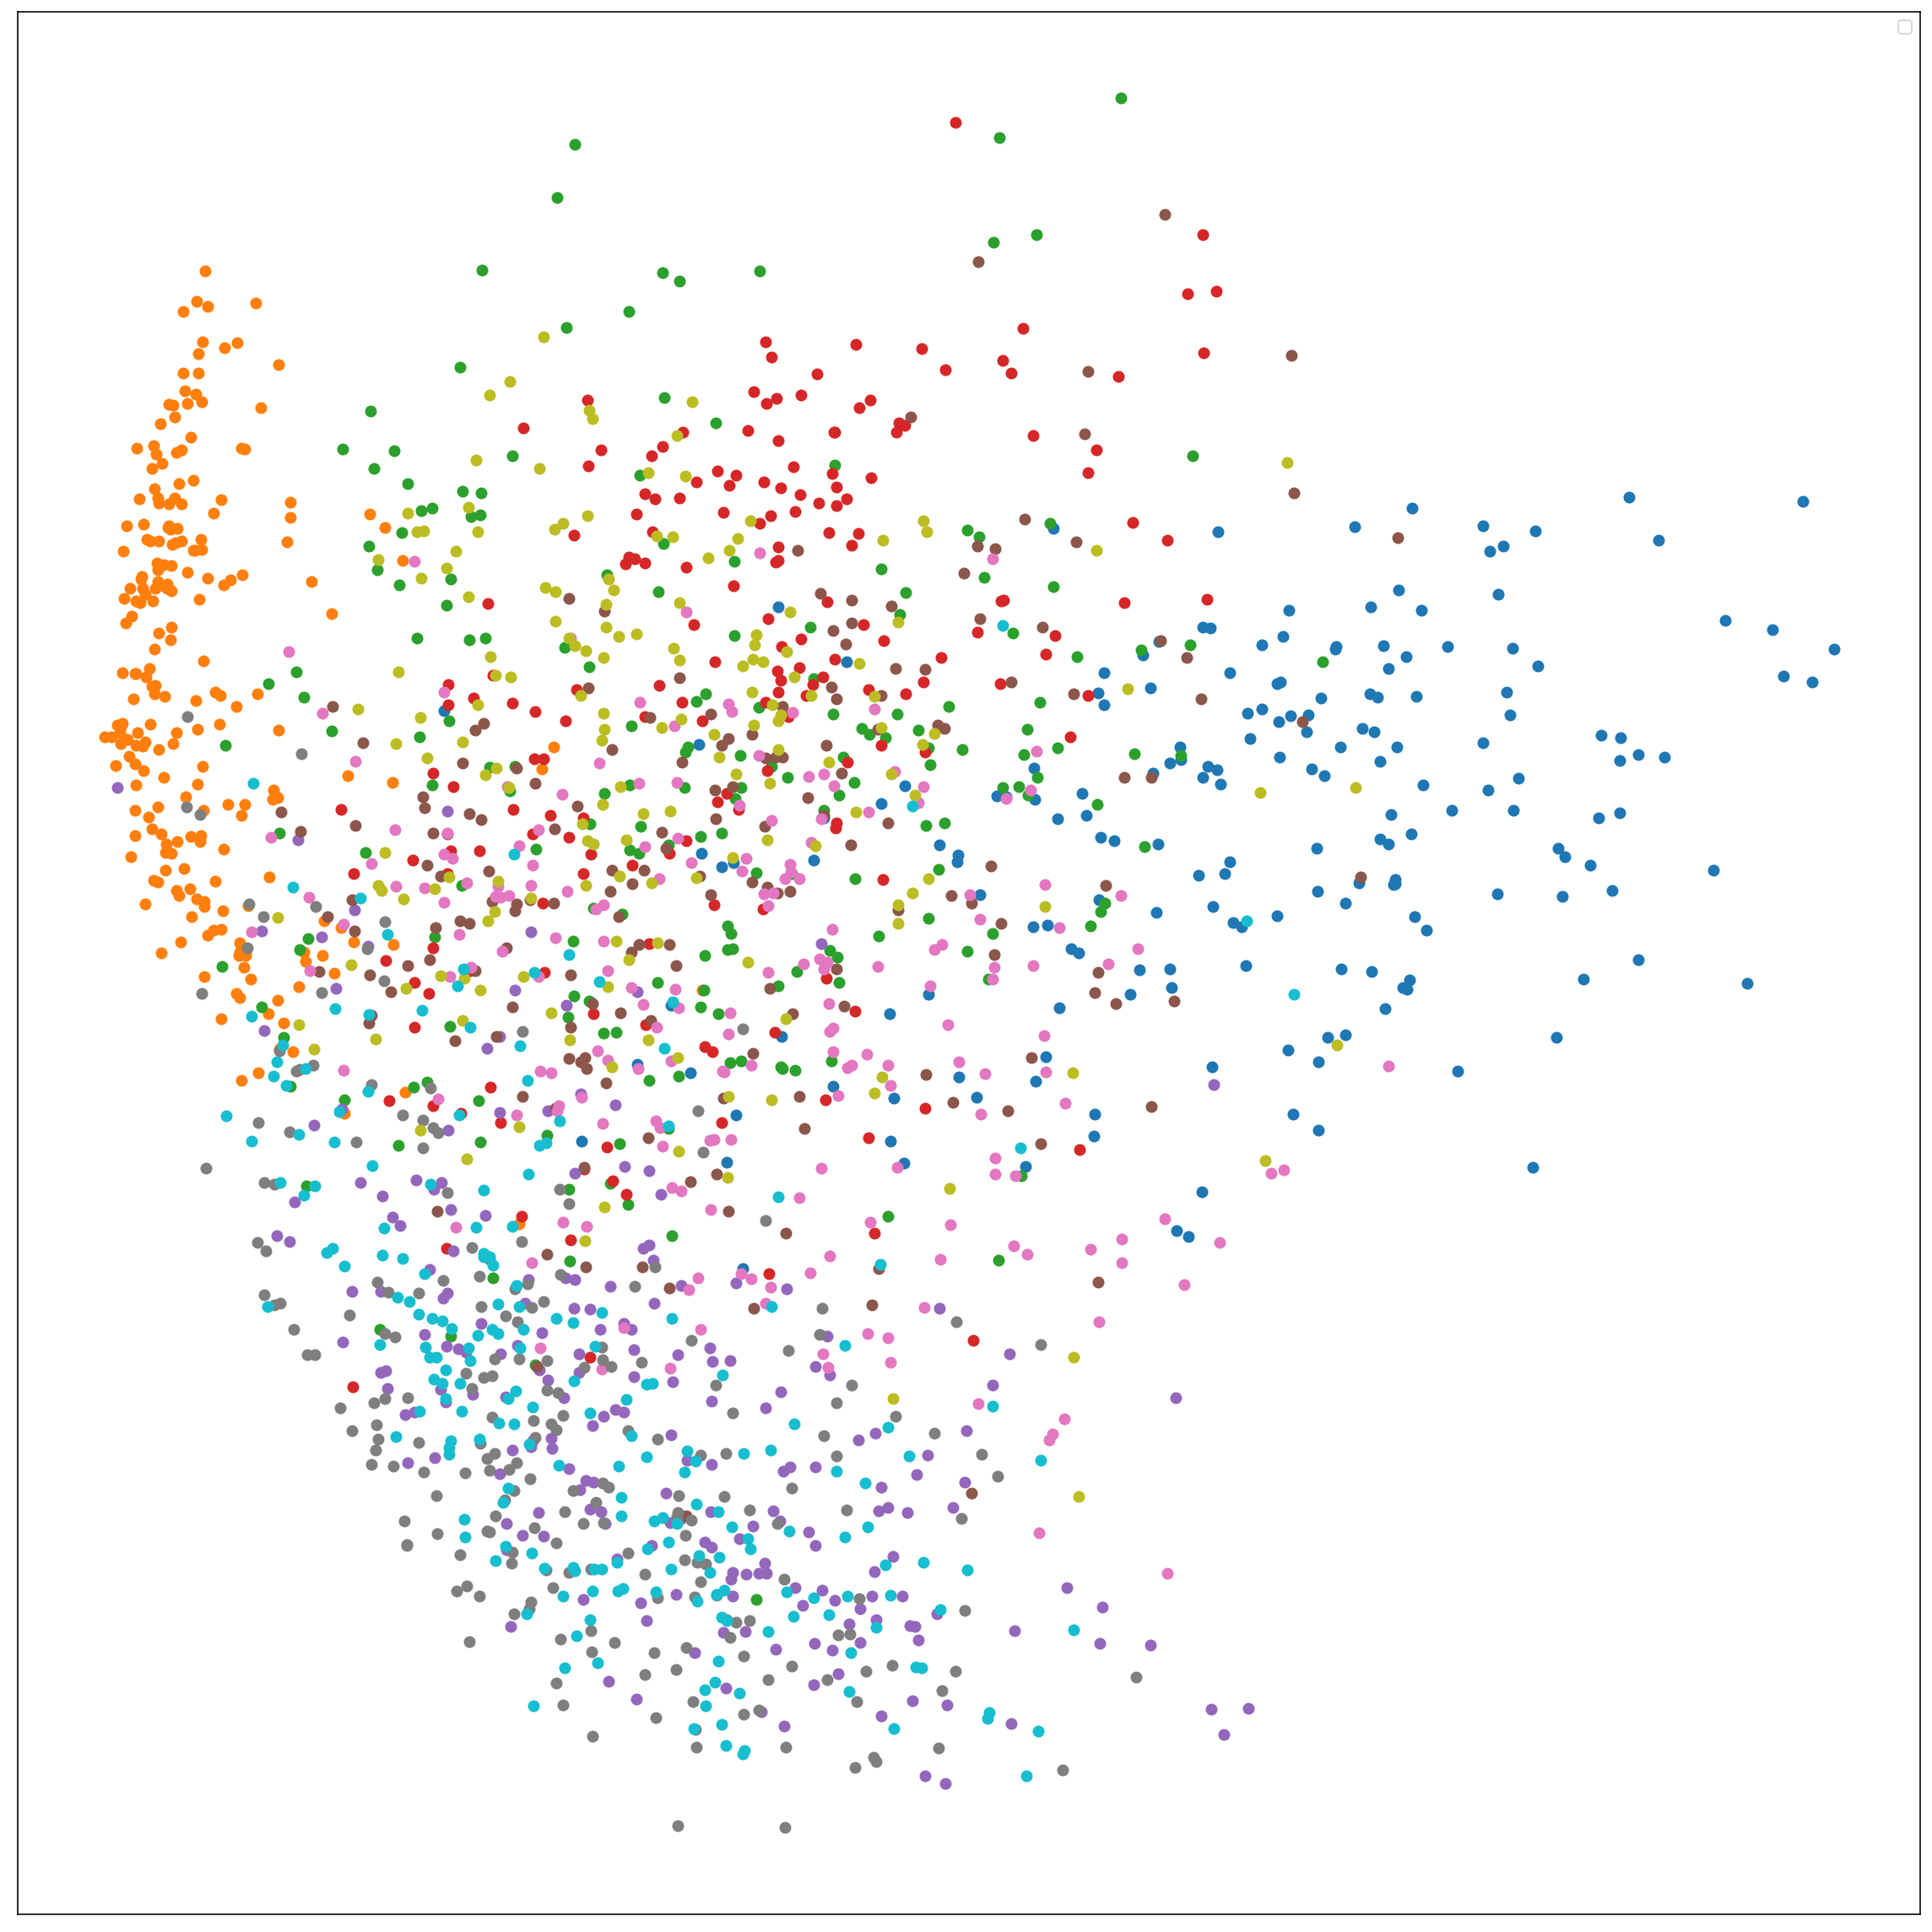

In [52]:
plot_2d_mnist_scatter(X_pca_embedded, y_small)      ## KAZDY RODZAJ CYFRY INNYM KOLOREM

### T-distributed Stochastic Neighbour Embedding (T-SNE)

Make sure to have a look on this increadible [article on T-SNE](https://distill.pub/2016/misread-tsne/).

Use `T-SNE` function to embed `X_small` in two dimensions. Store the result in `X_tsne_embedded`. <BR>
Use:
 * `n_iter=500` argument to limit the number of T-SNE iterations, 
 * `verbose=2` argument to see a verbose output during embedding.

In [53]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, n_iter=500, verbose=2)    # PODOBNIE JAK PCA
X_tsne_embedded = tsne.fit_transform(X_small)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2000 samples in 0.004s...
[t-SNE] Computed neighbors for 2000 samples in 0.456s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2000
[t-SNE] Computed conditional probabilities for sample 2000 / 2000
[t-SNE] Mean sigma: 2.528207
[t-SNE] Computed conditional probabilities in 0.127s
[t-SNE] Iteration 50: error = 78.0255508, gradient norm = 0.0035785 (50 iterations in 1.093s)
[t-SNE] Iteration 100: error = 75.8603592, gradient norm = 0.0194547 (50 iterations in 0.998s)
[t-SNE] Iteration 150: error = 75.6825562, gradient norm = 0.0009932 (50 iterations in 0.771s)
[t-SNE] Iteration 200: error = 75.6743546, gradient norm = 0.0015494 (50 iterations in 1.036s)
[t-SNE] Iteration 250: error = 75.6566010, gradient norm = 0.0134483 (50 iterations in 1.005s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 75.656601
[t-SNE] Iteration 300: error = 1.4846359, gradient norm = 0.0010183 (50 iterations in 1.994s)

In [54]:
X_tsne_embedded.shape

(2000, 2)

No handles with labels found to put in legend.


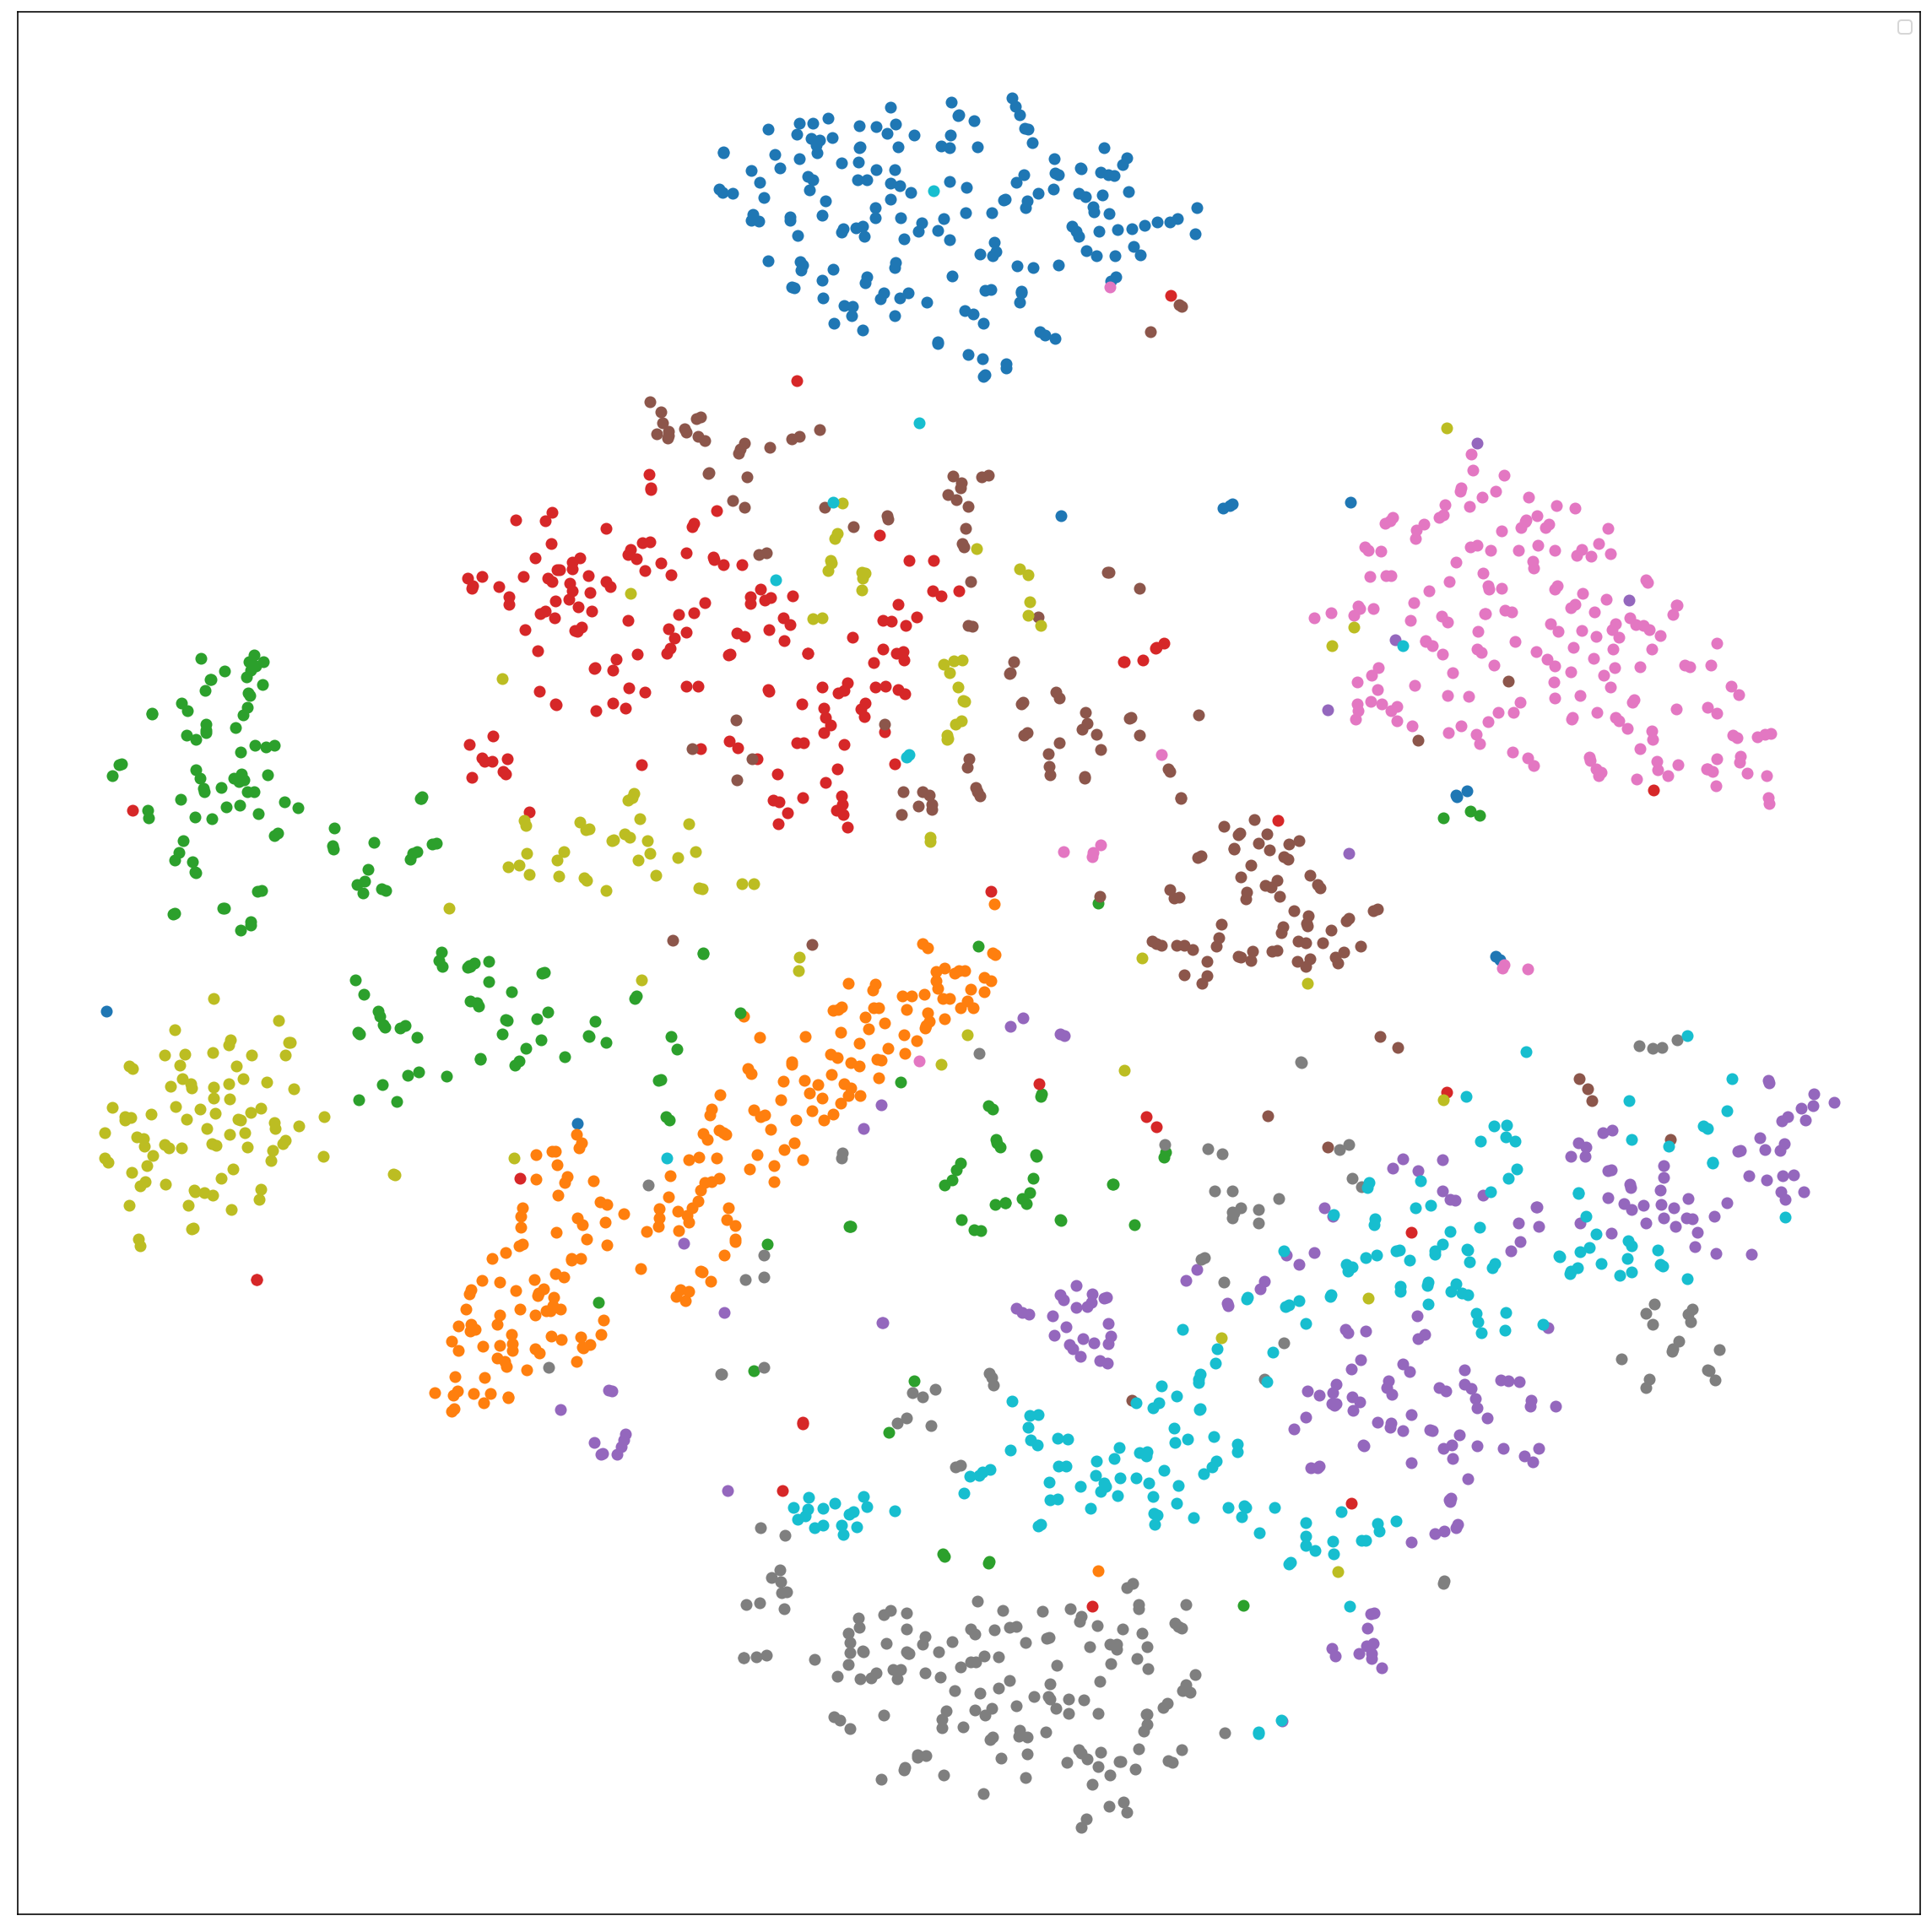

In [55]:
plot_2d_mnist_scatter(X_tsne_embedded, y_small)

### 3D interactive plots with plotly

In [56]:
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

init_notebook_mode(connected=True)

def plot_3d_mnist_plotly_scatter(X, y):
    def make_trace(i):
        digit_indeces = y == i
        return go.Scatter3d(
            x=X[digit_indeces, 0],
            y=X[digit_indeces, 1],
            z=X[digit_indeces, 2],
            mode='markers',
            name=str(i),
            marker=dict(
                color=i,
                colorscale='Jet',
                size=4,
                symbol='circle',
                line=dict(
                    color='rgb(204, 204, 204)',
                    width=1
                )
            )
        )
        
    traces = [make_trace(i) for i in range(10)]
    
    layout = go.Layout(margin=dict(l=0, r=0, b=0, t=0))
    fig = go.Figure(data=traces, layout=layout)
    iplot(fig)

Use PCA function to embed `X_small` in **three** dimensions. Store the result in `X_3d_pca_embedded`.

In [61]:
pca_3d = PCA(n_components=3)
pca_3d.fit(X_small)
X_3d_pca_embedded = pca_3d.transform(X_small)

In [62]:
X_3d_pca_embedded.shape

(2000, 3)

In [63]:
plot_3d_mnist_plotly_scatter(X_3d_pca_embedded, y_small)

## Classification task

In [64]:
from sklearn.model_selection import train_test_split
SAMPLES_LIMIT=10000
X_train, X_test, y_train, y_test = train_test_split(X[:SAMPLES_LIMIT], y[:SAMPLES_LIMIT], test_size=0.2)

In [65]:
from sklearn import svm
classifier = svm.SVC(C=1, gamma=0.001)       ## KARA ZLEJ KLASYFIKACJI TO C=1    GAMMA to jednostka odległości w kernelu bajesowskim, skala kernela
classifier.fit(X_train, y_train)

SVC(C=1, gamma=0.001)

In [66]:
from sklearn import metrics

predicted = classifier.predict(X_test)

print("Classification report for classifier {}:\n{}\n".format(
    classifier, metrics.classification_report(y_test, predicted)))

Classification report for classifier SVC(C=1, gamma=0.001):
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       217
           1       0.89      0.98      0.93       223
           2       0.89      0.86      0.88       192
           3       0.90      0.87      0.88       202
           4       0.87      0.93      0.90       179
           5       0.86      0.86      0.86       158
           6       0.93      0.97      0.95       212
           7       0.95      0.91      0.93       229
           8       0.93      0.84      0.88       184
           9       0.90      0.88      0.89       204

    accuracy                           0.91      2000
   macro avg       0.91      0.91      0.91      2000
weighted avg       0.91      0.91      0.91      2000




Calculate and display the confision matrix for `predicted` and `y_test` (use metrics package).

In [69]:
# confusion_matrix = ???
confusion_matrix = metrics.confusion_matrix(y_true=y_test, y_pred=predicted)

print("Confusion matrix:\n{}".format(confusion_matrix))

Confusion matrix:
[[214   0   0   0   2   0   1   0   0   0]
 [  0 219   1   0   0   1   0   1   0   1]
 [  2   4 165   1   3   2   7   2   5   1]
 [  0   4   7 175   1   7   1   2   2   3]
 [  0   1   1   0 167   0   3   1   1   5]
 [  1   6   2   6   3 136   2   0   2   0]
 [  0   0   1   0   2   4 205   0   0   0]
 [  0   6   2   0   4   0   0 208   0   9]
 [  1   6   4   7   0   8   1   1 155   1]
 [  0   0   2   5   9   1   0   5   2 180]]
